# Student Success Classification

This notebook is intended to be a place where our team experiments, works with, and models the data. Our goal is to classify the status of students between 3 distinct classes:
1. Drop out
2. Graduated
3. Enrolled

There are 36 features to predict this including demographic information, academic information, financial information, and a few economic indicators.

## Table of Contents

1. [Marital Status](#first-bullet)
2. [Application Mode](#second-bullet)
3. [Application Order](#third-bullet)
4. [Course](#fourth-bullet)
5. [Daytime/Evening Attendance](#fifth-bullet)
6. [Previous Qualifications](#sixth-bullet)
7. [Previous Qualification Grade](#seventh-bullet)
8. [Nationality](#eighth-bullet)
9. [Mother's Qualification](#ninth-bullet)
10. [Father's Qualification](#tenth-bullet)
11. [Mother's Occupation](#eleventh-bullet)
12. [Father's Occupation](#twelfth-bullet)
13. [Admission Grade](#thirteenth-bullet)
14. [Displaced](#fourteenth-bullet)
15. [Educational Special Needs](#fifteenth-bullet)
16. [Debter](#sixteenth-bullet)
17. [Tuition Fees Up To Date](#seventeenth-bullet)
18. [Gender](#eighteenth-bullet)
19. [Scholarship Holder](#nineteenth-bullet)
20. [Age at Enrollment](#twentieth-bullet)
21. [International](#twenty-first-bullet)
22. [Curricular Units 1st Sem (Credited)](#twenty-second-bullet)
23. [Curricular Units 1st Sem (Enrolled)](#twenty-third-bullet)
24. [Curricular Units 1st Sem (Evaluations)](#twenty-fourth-bullet)
25. [Curricular Units 1st Sem (Approved)](#twenty-fifth-bullet)
26. [Curricular Units 1st Sem (Grade)](#twenty-sixth-bullet)
27. [Curricular Units 1st Sem (Without Evaluations)](#twenty-seventh-bullet)
28. [Curricular Units 2nd Sem (Credited)](#twenty-eighth-bullet)
29. [Curricular Units 2nd Sem (Enrolled)](#twenty-ninth-bullet)
30. [Curricular Units 2nd Sem (Evaluations)](#thirtieth-bullet)
31. [Curricular Units 2nd Sem (Approved)](#thirty-first-bullet)
32. [Curricular Units 2nd Sem (Grade)](#thirty-second-bullet)
33. [Curricular Units 2nd Sem (Without Evaluations)](#thirty-third-bullet)
34. [Unemployment Rate](#thirty-fourth-bullet)
35. [Inflation Rate](#thirty-fifth-bullet)
36. [GDP](#thirty-sixth-bullet)

## Importing the data

In [1]:
%%bash
ls data

metadata.csv
student-dropout-academic-success.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use([i for i in plt.style.available if "seaborn" in i][0])

In [3]:
import pandas as pd

# importing data and insuring columns were read in correctly
raw_data = pd.read_csv("data/student-dropout-academic-success.csv", delimiter=";")
raw_data.columns = raw_data.columns.str.strip()
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

## Brief Look at the Data

In [4]:
# looking at target column
raw_data.Target.value_counts()

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [5]:
raw_data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Looking column by column

In [6]:
df = raw_data.copy()  # copying data to create a working copy
df.columns = df.columns.str.replace(" ", "_").str.lower()

### Marital Status <a class="anchor" id="first-bullet"></a>

In [7]:
df.marital_status.value_counts().sort_index()

marital_status
1    3919
2     379
3       4
4      91
5      25
6       6
Name: count, dtype: int64

1 – single 2 – married 3 – widower 4 – divorced 5 – facto union 6 – legally separated

We need to convert this ordinal column back to strings then we will one hot encode it.

In [8]:
df.marital_status = df.marital_status.map(
    {1: "single", 2: "married", 3: "widower", 4: "divorced", 5: "facto_union", 6: "legally_separated"}
)
grouped_marital_status = df.marital_status.value_counts()

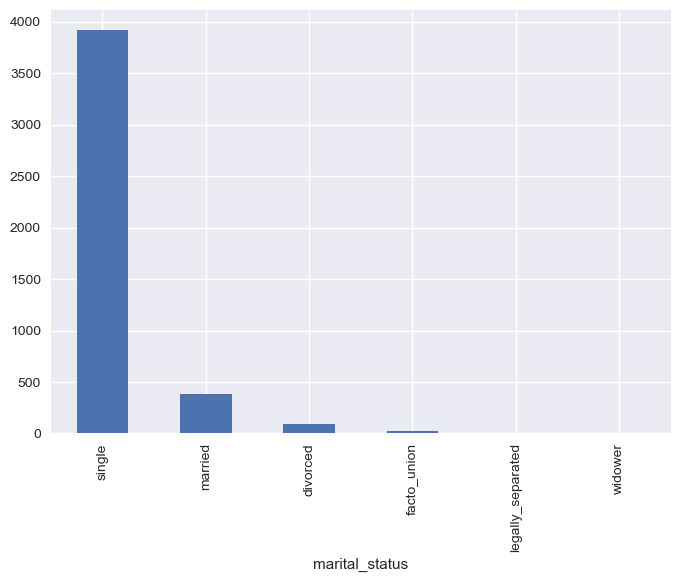

In [9]:
grouped_marital_status.plot(kind="bar");

In [10]:
normalized_target_by_marital = df.groupby(["marital_status", "target"])["target"].count() / df.groupby("marital_status")["target"].count()
normalized_target_by_marital

marital_status     target  
divorced           Dropout     0.461538
                   Enrolled    0.175824
                   Graduate    0.362637
facto_union        Dropout     0.440000
                   Enrolled    0.120000
                   Graduate    0.440000
legally_separated  Dropout     0.666667
                   Enrolled    0.166667
                   Graduate    0.166667
married            Dropout     0.472296
                   Enrolled    0.137203
                   Graduate    0.390501
single             Dropout     0.302118
                   Enrolled    0.183720
                   Graduate    0.514162
widower            Dropout     0.250000
                   Enrolled    0.500000
                   Graduate    0.250000
Name: target, dtype: float64

### Application Mode <a class="anchor" id="second-bullet"></a>

In [11]:
df.application_mode.value_counts().sort_index()

application_mode
1     1708
2        3
5       16
7      139
10      10
15      30
16      38
17     872
18     124
26       1
27       1
39     785
42      77
43     312
44     213
51      59
53      35
57       1
Name: count, dtype: int64

- 1 - 1st phase - general contingent 
- 2 - Ordinance No. 612/93 
- 5 - 1st phase - special contingent (Azores Island) 
- 7 - Holders of other higher courses 
- 10 - Ordinance No. 854-B/99 
- 15 - International student (bachelor) 
- 16 - 1st phase - special contingent (Madeira Island) 
- 17 - 2nd phase - general contingent 
- 18 - 3rd phase - general contingent 
- 26 - Ordinance No. 533-A/99, item b2) (Different Plan) 
- 27 - Ordinance No. 533-A/99, item b3 (Other Institution) 
- 39 - Over 23 years old 
- 42 - Transfer 
- 43 - Change of course 
- 44 - Technological specialization diploma holders 
- 51 - Change of institution/course 
- 53 - Short cycle diploma holders 
- 57 - Change of institution/course (International)

We need to convert this ordinal column back to strings then we will one hot encode it. It is unclear that this should be ordinal or nominal. We will treat it as nominal for now.

In [12]:
df.application_mode = df.application_mode.map(
    {
        1: "1st_phase_general_contingent", 2: "Ordinance_No_612/93", 
        5: "1st_phase_special_contingent_Azores_Island", 
        7: "Holders_of_other_higher_courses", 10: "Ordinance_No_854-B/99",
        15: "International_student_bachelor", 
        16: "1st_phase_special_contingent_Madeira_Island",
        17: "2nd_phase_general_contingent", 18: "3rd_phase_general_contingent",
        26: "Ordinance_No_533-A/99_item_b2_Different_Plan",
        27: "Ordinance_No_533-A/99_item_b3_Other_Institution",
        39: "Over_23_years_old", 42: "Transfer", 43: "Change_of_course",
        44: "Technological_specialization_diploma_holders",
        51: "Change_of_institution_course", 53: "Short_cycle_diploma_holders",
        57: "Change_of_institution_course_International"
    }
)
grouped_application_mode = df.application_mode.value_counts()
grouped_application_mode

application_mode
1st_phase_general_contingent                       1708
2nd_phase_general_contingent                        872
Over_23_years_old                                   785
Change_of_course                                    312
Technological_specialization_diploma_holders        213
Holders_of_other_higher_courses                     139
3rd_phase_general_contingent                        124
Transfer                                             77
Change_of_institution_course                         59
1st_phase_special_contingent_Madeira_Island          38
Short_cycle_diploma_holders                          35
International_student_bachelor                       30
1st_phase_special_contingent_Azores_Island           16
Ordinance_No_854-B/99                                10
Ordinance_No_612/93                                   3
Change_of_institution_course_International            1
Ordinance_No_533-A/99_item_b2_Different_Plan          1
Ordinance_No_533-A/99_item_b3_O

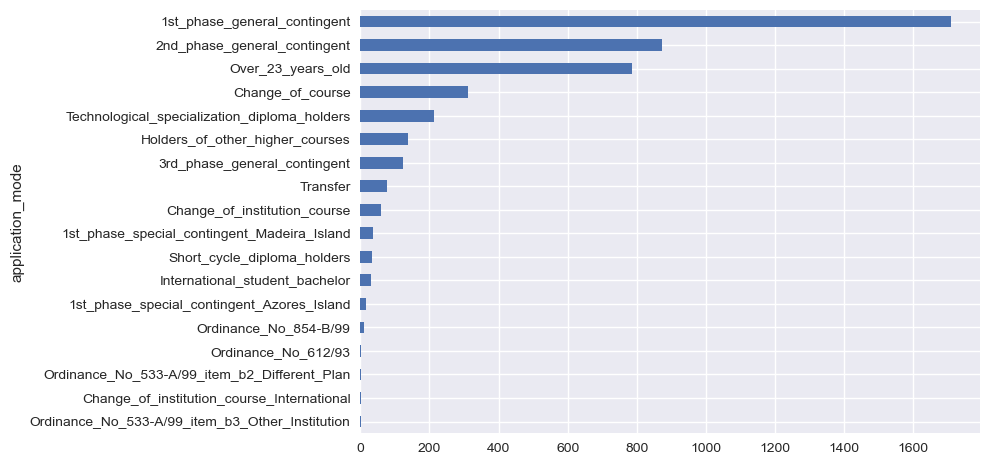

In [13]:
grouped_application_mode.sort_values().plot(kind="barh");

It seems most applicants are in the 1st or 2nd phase of the general contingent. We will one hot encode this column so, model can see differences among categories.

### Application Order <a class="anchor" id="third-bullet">

In [14]:
grouped_app_order = df.application_order.value_counts().sort_index()
grouped_app_order

application_order
0       1
1    3026
2     547
3     309
4     249
5     154
6     137
9       1
Name: count, dtype: int64

Application order (between 0 - first choice; and 9 last choice)

This column seems to actually be an ordered column so we can leave it like this.

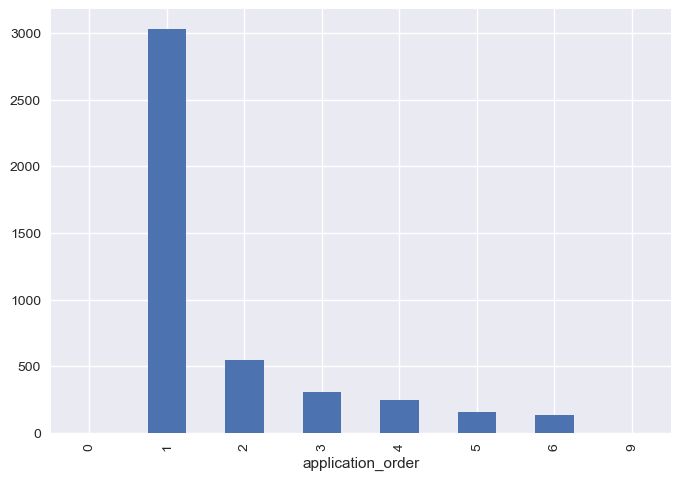

In [15]:
grouped_app_order.plot(kind="bar");

In [16]:
normalized_target_by_app_order = df.groupby(["application_order", "target"])["target"].count() / df.groupby("application_order")["target"].count()
normalized_target_by_app_order

application_order  target  
0                  Graduate    1.000000
1                  Dropout     0.347984
                   Enrolled    0.186715
                   Graduate    0.465301
2                  Dropout     0.274223
                   Enrolled    0.175503
                   Graduate    0.550274
3                  Dropout     0.245955
                   Enrolled    0.194175
                   Graduate    0.559871
4                  Dropout     0.232932
                   Enrolled    0.124498
                   Graduate    0.642570
5                  Dropout     0.344156
                   Enrolled    0.162338
                   Graduate    0.493506
6                  Dropout     0.226277
                   Enrolled    0.116788
                   Graduate    0.656934
9                  Enrolled    1.000000
Name: target, dtype: float64

### Course <a class="anchor" id="fourth-bullet">

In [17]:
grouped_course = df.course.value_counts().sort_index()
grouped_course

course
33       12
171     215
8014    215
9003    210
9070    226
9085    337
9119    170
9130    141
9147    380
9238    355
9254    252
9500    766
9556     86
9670    268
9773    331
9853    192
9991    268
Name: count, dtype: int64

- 33 - Biofuel Production Technologies 
- 171 - Animation and Multimedia Design 
- 8014 - Social Service (evening attendance) 
- 9003 - Agronomy 
- 9070 - Communication Design 
- 9085 - Veterinary Nursing 
- 9119 - Informatics Engineering 
- 9130 - Equinculture 
- 9147 - Management 
- 9238 - Social Service 
- 9254 - Tourism 
- 9500 - Nursing 
- 9556 - Oral Hygiene 
- 9670 - Advertising and Marketing Management 
- 9773 - Journalism and Communication 
- 9853 - Basic Education 
- 9991 - Management (evening attendance)

This data for the course column appears to course numbers so we will need to convert these to strings. We will also one hot encode this column. This is important because the model will see the numbers as ordinal and not nominal.

In [18]:
df.course = df.course.map({
    33: "Biofuel_Production_Technologies", 171: "Animation_and_Multimedia_Design",
    8014: "Social_Service_evening_attendance", 9003: "Agronomy",
    9070: "Communication_Design", 9085: "Veterinary_Nursing",
    9119: "Informatics_Engineering", 9130: "Equinculture",
    9147: "Management", 9238: "Social_Service",
    9254: "Tourism", 9500: "Nursing",
    9556: "Oral_Hygiene", 9670: "Advertising_and_Marketing_Management",
    9773: "Journalism_and_Communication", 9853: "Basic_Education",
    9991: "Management_evening_attendance"
})
grouped_courses_clean = df.course.value_counts()
grouped_courses_clean

course
Nursing                                 766
Management                              380
Social_Service                          355
Veterinary_Nursing                      337
Journalism_and_Communication            331
Advertising_and_Marketing_Management    268
Management_evening_attendance           268
Tourism                                 252
Communication_Design                    226
Animation_and_Multimedia_Design         215
Social_Service_evening_attendance       215
Agronomy                                210
Basic_Education                         192
Informatics_Engineering                 170
Equinculture                            141
Oral_Hygiene                             86
Biofuel_Production_Technologies          12
Name: count, dtype: int64

### Daytime/Evening Attendance <a class="anchor" id="fifth-bullet">

In [19]:
df["daytime/evening_attendance"].value_counts().sort_index()

daytime/evening_attendance
0     483
1    3941
Name: count, dtype: int64

This column appears to be binary, 1 for daytime and 0 for evening. We will turn into strings to keep clarity for later transformation steps.

In [20]:
df["daytime/evening_attendance"] = df["daytime/evening_attendance"].map({1: "daytime", 0: "evening"})
grouped_attendance = df["daytime/evening_attendance"].value_counts()
grouped_attendance

daytime/evening_attendance
daytime    3941
evening     483
Name: count, dtype: int64

### Previous Qualifications <a class="anchor" id="sixth-bullet">

In [21]:
df.previous_qualification.value_counts().sort_index()

previous_qualification
1     3717
2       23
3      126
4        8
5        1
6       16
9       11
10       4
12      45
14       1
15       2
19     162
38       7
39     219
40      40
42      36
43       6
Name: count, dtype: int64

- 1 - Secondary education 
- 2 - Higher education - bachelor's degree 
- 3 - Higher education - degree 
- 4 - Higher education - master's 
- 5 - Higher education - doctorate 
- 6 - Frequency of higher education 
- 9 - 12th year of schooling - not completed 
- 10 - 11th year of schooling - not completed 
- 12 - Other - 11th year of schooling 
- 14 - 10th year of schooling 
- 15 - 10th year of schooling - not completed 
- 19 - Basic education 3rd cycle (9th/10th/11th year) or equiv. 
- 38 - Basic education 2nd cycle (6th/7th/8th year) or equiv. 
- 39 - Technological specialization course 
- 40 - Higher education - degree (1st cycle) 
- 42 - Professional higher technical course 
- 43 - Higher education - master (2nd cycle)

This column provides information about how much school someone has completed I am still unsure if this can be made ordinal or nominal. We will treat it as nominal for now.

In [22]:
df.previous_qualification = df.previous_qualification.map({
    1: "Secondary_education", 2: "Higher_education_bachelors_degree",
    3: "Higher_education_degree", 4: "Higher_education_masters",
    5: "Higher_education_doctorate", 6: "Frequency_of_higher_education",
    9: "12th_year_of_schooling_not_completed", 10: "11th_year_of_schooling_not_completed",
    12: "Other_11th_year_of_schooling", 14: "10th_year_of_schooling",
    15: "10th_year_of_schooling_not_completed",
    19: "Basic_education_3rd_cycle_9th/10th/11th_year_or_equiv",
    38: "Basic_education_2nd_cycle_6th/7th/8th_year_or_equiv",
    39: "Technological_specialization_course",
    40: "Higher_education_degree_1st_cycle",
    42: "Professional_higher_technical_course",
    43: "Higher_education_master_2nd_cycle"
})
grouped_previous_qualifications = df.previous_qualification.value_counts()
grouped_previous_qualifications

previous_qualification
Secondary_education                                      3717
Technological_specialization_course                       219
Basic_education_3rd_cycle_9th/10th/11th_year_or_equiv     162
Higher_education_degree                                   126
Other_11th_year_of_schooling                               45
Higher_education_degree_1st_cycle                          40
Professional_higher_technical_course                       36
Higher_education_bachelors_degree                          23
Frequency_of_higher_education                              16
12th_year_of_schooling_not_completed                       11
Higher_education_masters                                    8
Basic_education_2nd_cycle_6th/7th/8th_year_or_equiv         7
Higher_education_master_2nd_cycle                           6
11th_year_of_schooling_not_completed                        4
10th_year_of_schooling_not_completed                        2
Higher_education_doctorate                     

### Previous Qualification Grade <a class="anchor" id="seventh-bullet">

Grade of previous qualification (between 0 and 200)

In [23]:
df["previous_qualification_(grade)"].describe()

count    4424.000000
mean      132.613314
std        13.188332
min        95.000000
25%       125.000000
50%       133.100000
75%       140.000000
max       190.000000
Name: previous_qualification_(grade), dtype: float64

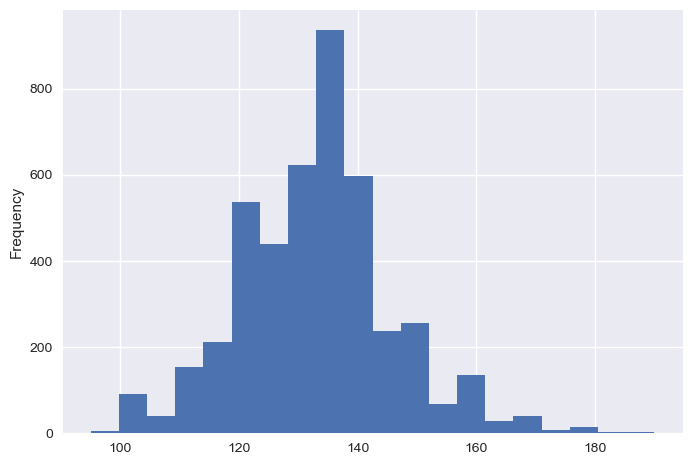

In [24]:
df["previous_qualification_(grade)"].plot(kind="hist", bins=20);

This data look to be normally distributed with a mean of 132 and standard deviation of 13. For the model we can consider transforming this column to a z-score.

### Nationality <a class="anchor" id="eighth-bullet">

This column needs to be renamed from Nacionality to Nationality

In [25]:
df.nacionality.value_counts().sort_index()

nacionality
1      4314
2         2
6        13
11        3
13        1
14        1
17        1
21        2
22       13
24        5
25        2
26       14
32        1
41       38
62        2
100       3
101       2
103       3
105       2
108       1
109       1
Name: count, dtype: int64

- This is a nominal column of where someone is from, we will convert this back to strings then later one hot encode it.

- 1 - Portuguese; 
- 2 - German; 
- 6 - Spanish; 
- 11 - Italian; 
- 13 - Dutch; 
- 14 - English; 
- 17 - Lithuanian; 
- 21 - Angolan; 
- 22 - Cape Verdean; 
- 24 - Guinean; 
- 25 - Mozambican; 
- 26 - Santomean; 
- 32 - Turkish; 
- 41 - Brazilian; 
- 62 - Romanian; 
- 100 - Moldova (Republic of); 
- 101 - Mexican; 
- 103 - Ukrainian; 
- 105 - Russian; 
- 108 - Cuban; 
- 109 - Colombian

In [26]:
df = df.rename(columns={"nacionality": "nationality"})

In [27]:
df.nationality = df.nationality.map({
    1: "Portuguese", 2: "German", 6: "Spanish", 11: "Italian",
    13: "Dutch", 14: "English", 17: "Lithuanian", 21: "Angolan",
    22: "Cape_Verdean", 24: "Guinean", 25: "Mozambican",
    26: "Santomean", 32: "Turkish", 41: "Brazilian",
    62: "Romanian", 100: "Moldova_Republic_of",
    101: "Mexican", 103: "Ukrainian", 105: "Russian",
    108: "Cuban", 109: "Colombian"
})
grouped_nationality = df.nationality.value_counts()
grouped_nationality

nationality
Portuguese             4314
Brazilian                38
Santomean                14
Cape_Verdean             13
Spanish                  13
Guinean                   5
Moldova_Republic_of       3
Italian                   3
Ukrainian                 3
Angolan                   2
Mexican                   2
Romanian                  2
Mozambican                2
German                    2
Russian                   2
Turkish                   1
Dutch                     1
Colombian                 1
Cuban                     1
English                   1
Lithuanian                1
Name: count, dtype: int64

### Mother's Qualification <a class="anchor" id="ninth-bullet">

- 1 - Secondary Education - 12th Year of Schooling or Eq. 
- 2 - Higher Education - Bachelor's Degree 
- 3 - Higher Education - Degree 
- 4 - Higher Education - Master's 
- 5 - Higher Education - Doctorate 
- 6 - Frequency of Higher Education 
- 9 - 12th Year of Schooling - Not Completed 
- 10 - 11th Year of Schooling - Not Completed 
- 11 - 7th Year (Old) 
- 12 - Other - 11th Year of Schooling 
- 14 - 10th Year of Schooling 
- 18 - General commerce course 
- 19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv. 
- 22 - Technical-professional course 
- 26 - 7th year of schooling 
- 27 - 2nd cycle of the general high school course 
- 29 - 9th Year of Schooling - Not Completed 
- 30 - 8th year of schooling 
- 34 - Unknown 
- 35 - Can't read or write 
- 36 - Can read without having a 4th year of schooling 
- 37 - Basic education 1st cycle (4th/5th year) or equiv. 
- 38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv. 
- 39 - Technological specialization course 
- 40 - Higher education - degree (1st cycle) 
- 41 - Specialized higher studies course 
- 42 - Professional higher technical course 
- 43 - Higher Education - Master (2nd cycle) 
- 44 - Higher Education - Doctorate (3rd cycle)

In [28]:
df["mother's_qualification"].value_counts().sort_index()

mother's_qualification
1     1069
2       83
3      438
4       49
5       21
6        4
9        8
10       3
11       3
12      42
14       2
18       1
19     953
22       1
26       1
27       1
29       3
30       3
34     130
35       3
36       3
37    1009
38     562
39       8
40       9
41       6
42       4
43       4
44       1
Name: count, dtype: int64

In [29]:
df["mother\'s_qualification"] = df["mother\'s_qualification"].map({
    1: "Secondary_Education_12th_Year_of_Schooling_or_Eq",
    2: "Higher_Education_Bachelors_Degree",
    3: "Higher_Education_Degree",
    4: "Higher_Education_Masters",
    5: "Higher_Education_Doctorate",
    6: "Frequency_of_Higher_Education",
    9: "12th_Year_of_Schooling_Not_Completed",
    10: "11th_Year_of_Schooling_Not_Completed",
    11: "7th_Year_Old",
    12: "Other_11th_Year_of_Schooling",
    14: "10th_Year_of_Schooling",
    18: "General_commerce_course",
    19: "Basic_Education_3rd_Cycle_9th/10th/11th_Year_or_Equiv",
    22: "Technical-professional_course",
    26: "7th_year_of_schooling",
    27: "2nd_cycle_of_the_general_high_school_course",
    29: "9th_Year_of_Schooling_Not_Completed",
    30: "8th_year_of_schooling",
    34: "Unknown",
    35: "Can't_read_or_write",
    36: "Can_read_without_having_a_4th_year_of_schooling",
    37: "Basic_education_1st_cycle_4th/5th_year_or_equiv",
    38: "Basic_Education_2nd_Cycle_6th/7th/8th_Year_or_Equiv",
    39: "Technological_specialization_course",
    40: "Higher_education_degree_1st_cycle",
    41: "Specialized_higher_studies_course",
    42: "Professional_higher_technical_course",
    43: "Higher_Education_Master_2nd_cycle",
    44: "Higher_Education_Doctorate_3rd_cycle"
})

In [30]:
grouped_mothers_qualification = df["mother's_qualification"].value_counts()
grouped_mothers_qualification

mother's_qualification
Secondary_Education_12th_Year_of_Schooling_or_Eq         1069
Basic_education_1st_cycle_4th/5th_year_or_equiv          1009
Basic_Education_3rd_Cycle_9th/10th/11th_Year_or_Equiv     953
Basic_Education_2nd_Cycle_6th/7th/8th_Year_or_Equiv       562
Higher_Education_Degree                                   438
Unknown                                                   130
Higher_Education_Bachelors_Degree                          83
Higher_Education_Masters                                   49
Other_11th_Year_of_Schooling                               42
Higher_Education_Doctorate                                 21
Higher_education_degree_1st_cycle                           9
12th_Year_of_Schooling_Not_Completed                        8
Technological_specialization_course                         8
Specialized_higher_studies_course                           6
Frequency_of_Higher_Education                               4
Professional_higher_technical_course           

In [31]:
df.isna().sum()

marital_status                                    0
application_mode                                  0
application_order                                 0
course                                            0
daytime/evening_attendance                        0
previous_qualification                            0
previous_qualification_(grade)                    0
nationality                                       0
mother's_qualification                            0
father's_qualification                            0
mother's_occupation                               0
father's_occupation                               0
admission_grade                                   0
displaced                                         0
educational_special_needs                         0
debtor                                            0
tuition_fees_up_to_date                           0
gender                                            0
scholarship_holder                                0
age_at_enrol

### Scholarship Holder <a class="anchor" id="nineteenth-bullet">

In [32]:
df.scholarship_holder.value_counts()

scholarship_holder
0    3325
1    1099
Name: count, dtype: int64

In [33]:
df["scholarship_holder"] = df["scholarship_holder"].map({1: "Yes", 0: "No"})

In [34]:
percentage_holders = len(df[df['scholarship_holder'] == "No"]) / len(df) * 100
percentage_no_holders = len(df[df['scholarship_holder'] == "Yes"]) / len(df) * 100
print("% scholasrhip holders = ", percentage_holders)
print("% no scholarship holders = ", percentage_no_holders)

% scholasrhip holders =  75.15822784810126
% no scholarship holders =  24.841772151898734


### Age At Enrollment <a class="anchor" id="twentieth-bullet">

In [35]:
df.age_at_enrollment.value_counts()
df.age_at_enrollment.describe()

count    4424.000000
mean       23.265145
std         7.587816
min        17.000000
25%        19.000000
50%        20.000000
75%        25.000000
max        70.000000
Name: age_at_enrollment, dtype: float64

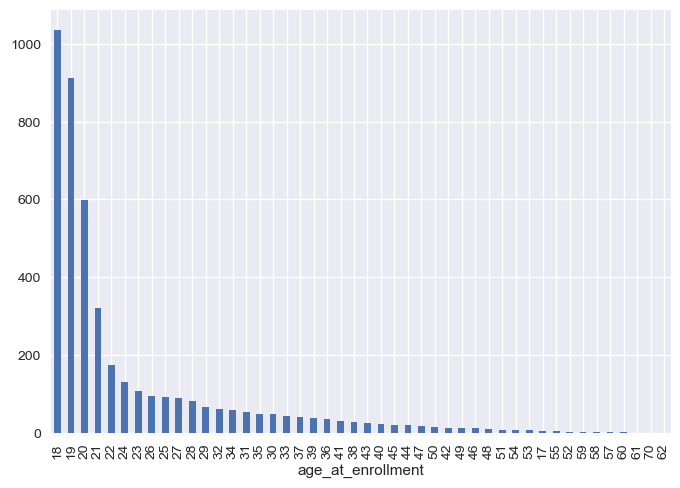

In [36]:
df["age_at_enrollment"].value_counts().plot(kind="bar");

### International <a class="anchor" id="twenty-first-bullet">

In [37]:
df.international.value_counts()

international
0    4314
1     110
Name: count, dtype: int64

In [38]:
df["international"] = df["international"].map({1: "Yes", 0: "No"})

In [39]:
percentage_locals = len(df[df['international'] == "No"]) / len(df) * 100
percentage_no_locals = len(df[df['international'] == "Yes"]) / len(df) * 100
print("% local students = ", percentage_locals)
print("% no local students = ", percentage_no_locals)

% local students =  97.51356238698011
% no local students =  2.4864376130198913


### Curricular units 1st sem (credited)  <a class="anchor" id="twenty-second-bullet">

In [40]:
print(df['curricular_units_1st_sem_(credited)'].describe())

count    4424.000000
mean        0.709991
std         2.360507
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        20.000000
Name: curricular_units_1st_sem_(credited), dtype: float64


In [41]:
print(df["curricular_units_1st_sem_(credited)"].value_counts().sort_index())

curricular_units_1st_sem_(credited)
0     3847
1       85
2       94
3       69
4       47
5       41
6       51
7       41
8       31
9       27
10      15
11      17
12      12
13      13
14      15
15       5
16       3
17       3
18       4
19       2
20       2
Name: count, dtype: int64


- 1st column number of units
- 2nd column number of students that credited that amount of units

Example:
3847 students creditted 0 units,
while 2 students creditted 20 units in one semester


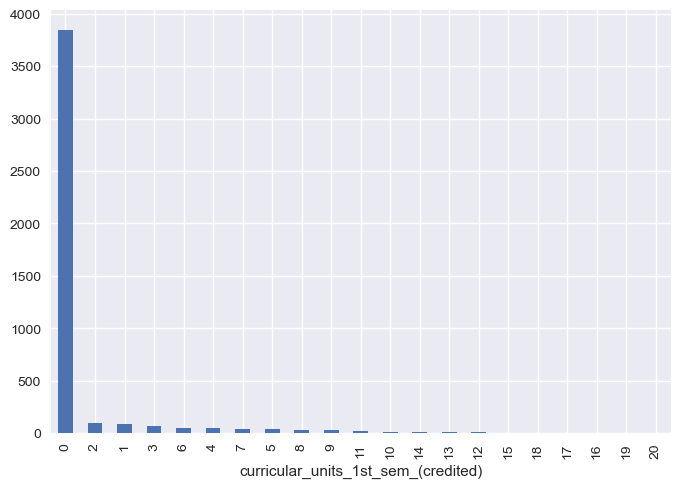

In [42]:
df["curricular_units_1st_sem_(credited)"].value_counts().plot(kind="bar");

### Curricular units 1st sem (enrolled) <a class="anchor" id="twenty-third-bullet">

In [43]:
print(df['curricular_units_1st_sem_(enrolled)'].describe())

count    4424.000000
mean        6.270570
std         2.480178
min         0.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        26.000000
Name: curricular_units_1st_sem_(enrolled), dtype: float64


In [44]:
print(df["curricular_units_1st_sem_(enrolled)"].value_counts().sort_index())

curricular_units_1st_sem_(enrolled)
0      180
1        7
2        9
3       10
4       21
5     1010
6     1910
7      656
8      296
9       36
10      52
11      45
12      66
13      20
14      22
15      25
16      13
17      16
18      19
19       2
21       6
23       2
26       1
Name: count, dtype: int64


- 1st column number of units enrolled
- 2nd column number of students that enrolled that amount of units

Example: only one students enrolled 26 units!!

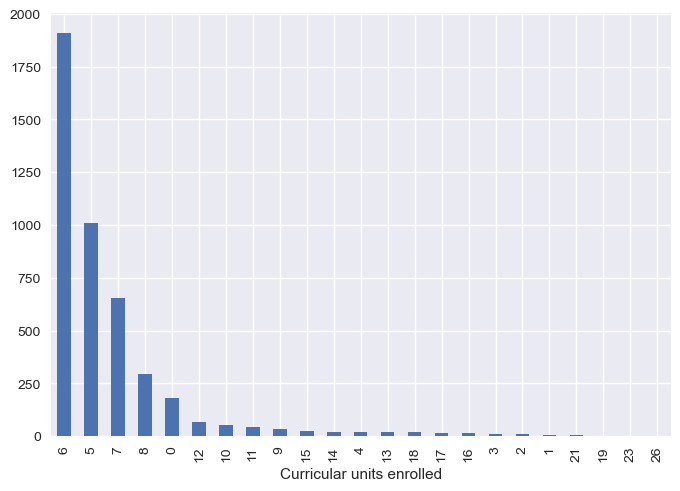

In [45]:
df["curricular_units_1st_sem_(enrolled)"].value_counts().plot(kind="bar", xlabel = "Curricular units enrolled");

### Curricular units 1st sem (evaluations) <a class="anchor" id="twenty-fourth-bullet">

In [46]:
print(df['curricular_units_1st_sem_(evaluations)'].describe())

count    4424.000000
mean        8.299051
std         4.179106
min         0.000000
25%         6.000000
50%         8.000000
75%        10.000000
max        45.000000
Name: curricular_units_1st_sem_(evaluations), dtype: float64


In [47]:
print(df["curricular_units_1st_sem_(evaluations)"].value_counts().sort_index())

curricular_units_1st_sem_(evaluations)
0     349
1       6
2       8
3       6
4      19
5     220
6     598
7     703
8     791
9     402
10    340
11    239
12    223
13    140
14    105
15     70
16     47
17     33
18     30
19     23
20     12
21     17
22     10
23      9
24      6
25      3
26      4
27      2
28      1
29      2
31      1
32      1
33      1
36      1
45      2
Name: count, dtype: int64


- 1st column number of units evaluated
- 2nd column number of students that were evaluated

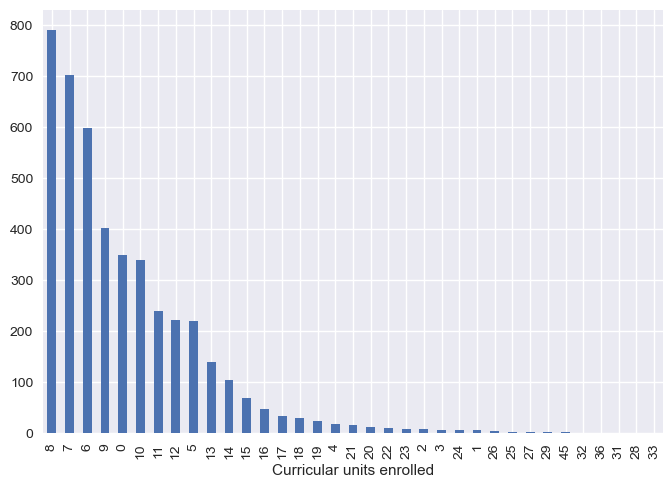

In [48]:
df["curricular_units_1st_sem_(evaluations)"].value_counts().plot(kind="bar", xlabel = "Curricular units enrolled");

### Curricular units 1st sem (Approved) <a class="anchor" id="twenty-fifth-bullet">

In [49]:
df["curricular_units_1st_sem_(approved)"].value_counts().sort_index()[:5]

curricular_units_1st_sem_(approved)
0    718
1    127
2    160
3    269
4    433
Name: count, dtype: int64

This feature describes the number of curricular units approved in the 1st semester.

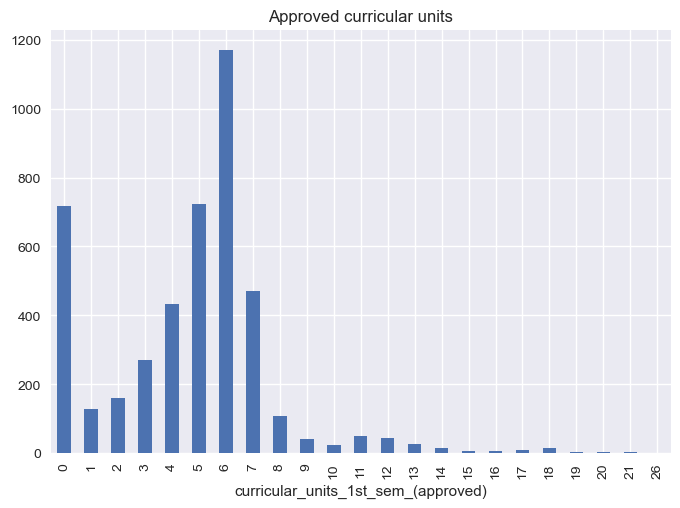

In [50]:
df["curricular_units_1st_sem_(approved)"].value_counts().sort_index().plot(kind="bar")
plt.title("Approved curricular units")
plt.show()

### Curricular units 1st sem (Grade) <a class="anchor" id="twenty-sixth-bullet">

In [51]:
df["curricular_units_1st_sem_(grade)"].describe()

count    4424.000000
mean       10.640822
std         4.843663
min         0.000000
25%        11.000000
50%        12.285714
75%        13.400000
max        18.875000
Name: curricular_units_1st_sem_(grade), dtype: float64

In [52]:
print(df["curricular_units_1st_sem_(grade)"].value_counts().sort_index())

curricular_units_1st_sem_(grade)
0.000000     718
9.800000       1
10.000000     82
10.166667      1
10.200000      8
            ... 
17.111111      1
17.125000      1
17.333333      2
18.000000      2
18.875000      1
Name: count, Length: 805, dtype: int64


- 1st column grade of the unit (0 - 20)
- 2dn column students that got this grade
  
  Example: 718 students got a grade of 0 in some unit.
  The grade is a continuos variable

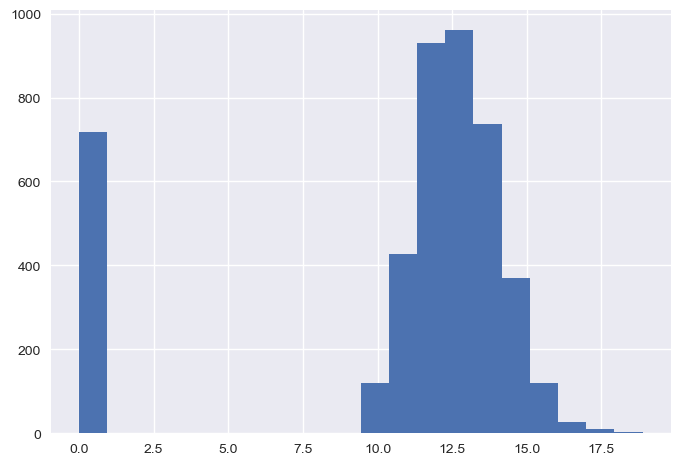

In [53]:
df['curricular_units_1st_sem_(grade)'].hist(bins=20);

### Curricular units 1st sem (without evaluations) <a class="anchor" id="twenty-seventh-bullet">

In [54]:
print(df["curricular_units_1st_sem_(without_evaluations)"].value_counts().sort_index())

curricular_units_1st_sem_(without_evaluations)
0     4130
1      153
2       79
3       23
4       15
5        5
6        6
7        6
8        4
10       1
12       2
Name: count, dtype: int64


- 1st column: Number of units with not evaluation
- 2nd column: Number of students that got this number of unis with no evaluation

Example: 4130 students got 0 units with no evaluation

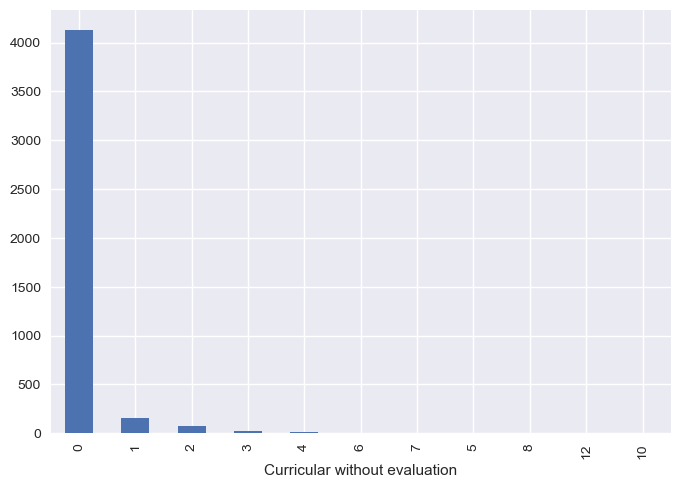

In [55]:
df["curricular_units_1st_sem_(without_evaluations)"].value_counts().plot(kind="bar", xlabel = "Curricular without evaluation");

### Curricular units 2nd sem (credited) <a class="anchor" id="twenty-eighth-bullet">

In [56]:
df['curricular_units_2nd_sem_(credited)'].describe()

count    4424.000000
mean        0.541817
std         1.918546
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        19.000000
Name: curricular_units_2nd_sem_(credited), dtype: float64

In [57]:
units_2nd_sem_credited = df['curricular_units_2nd_sem_(credited)'].value_counts().sort_index()
units_2nd_sem_credited

curricular_units_2nd_sem_(credited)
0     3894
1      107
2       92
3       49
4       78
5       68
6       26
7       16
8       12
9       15
10      13
11      20
12      14
13       9
14       4
15       2
16       2
18       2
19       1
Name: count, dtype: int64

Columns:
- 1- Number of curricular units credited in 2nd semester
- 2- Number of students

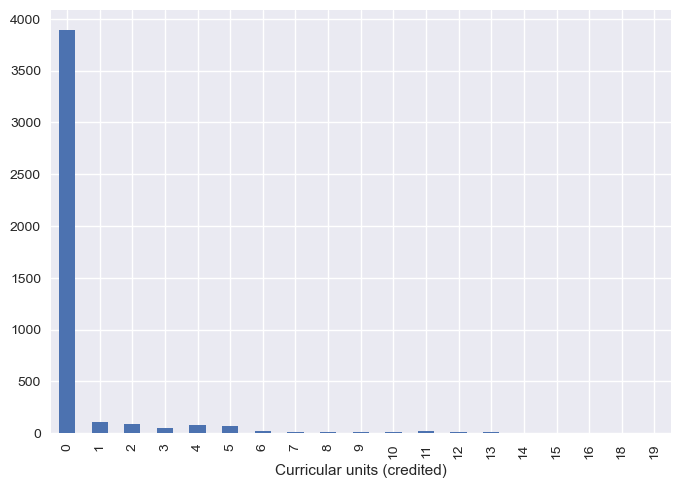

In [58]:
units_2nd_sem_credited.plot(xlabel='Curricular units (credited)',kind='bar');

### Curricular units 2nd sem (enrolled) <a class="anchor" id="twenty-ninth-bullet">

In [59]:
df['curricular_units_2nd_sem_(enrolled)'].describe()

count    4424.000000
mean        6.232143
std         2.195951
min         0.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        23.000000
Name: curricular_units_2nd_sem_(enrolled), dtype: float64

In [60]:
units_2nd_sem_enrolled = df['curricular_units_2nd_sem_(enrolled)'].value_counts().sort_index()
units_2nd_sem_enrolled

curricular_units_2nd_sem_(enrolled)
0      180
1        3
2        5
3        3
4       17
5     1054
6     1913
7      304
8      661
9       50
10      48
11      60
12      44
13      37
14      22
15       2
16       1
17      12
18       2
19       3
21       1
23       2
Name: count, dtype: int64

Columns:
- 1- Number of curricular units enrolled in 2nd semester
- 2- Number of students

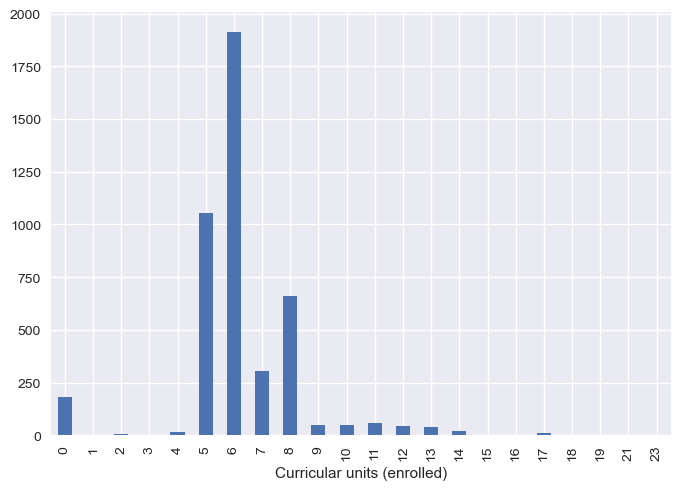

In [61]:
units_2nd_sem_enrolled.plot(xlabel='Curricular units (enrolled)',kind='bar');

### Curricular units 2nd sem (evaluations) <a class="anchor" id="thirtieth-bullet">

In [62]:
df['curricular_units_2nd_sem_(evaluations)'].describe()

count    4424.000000
mean        8.063291
std         3.947951
min         0.000000
25%         6.000000
50%         8.000000
75%        10.000000
max        33.000000
Name: curricular_units_2nd_sem_(evaluations), dtype: float64

In [63]:
units_2nd_sem_evaluations = df['curricular_units_2nd_sem_(evaluations)'].value_counts().sort_index()
units_2nd_sem_evaluations

curricular_units_2nd_sem_(evaluations)
0     401
1       3
2       4
3       2
4      10
5     288
6     614
7     563
8     792
9     456
10    355
11    255
12    226
13    126
14     98
15     73
16     49
17     25
18     22
19     19
20      8
21     10
22     10
23      4
24      3
25      1
26      3
27      2
28      1
33      1
Name: count, dtype: int64

Columns:
- 1- Number of curricular units (evaluations) in 2nd semester
- 2- Number of students

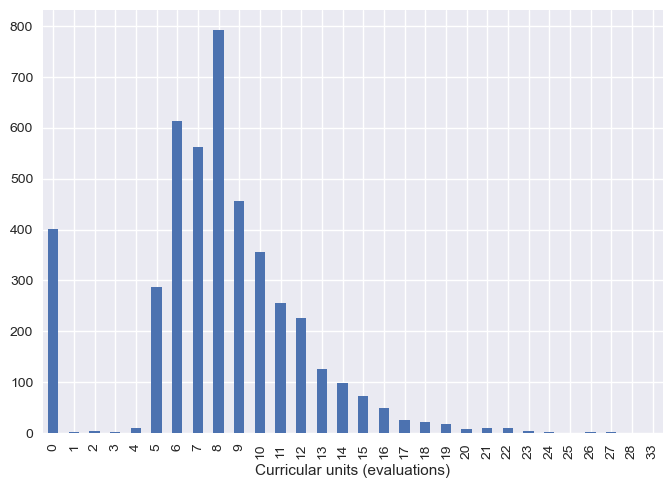

In [64]:
units_2nd_sem_evaluations.plot(xlabel='Curricular units (evaluations)',kind='bar');

### Curricular units 2nd sem (approved) <a class="anchor" id="thirty-first-bullet">

In [65]:
df['curricular_units_2nd_sem_(approved)'].describe()

count    4424.000000
mean        4.435805
std         3.014764
min         0.000000
25%         2.000000
50%         5.000000
75%         6.000000
max        20.000000
Name: curricular_units_2nd_sem_(approved), dtype: float64

In [66]:
units_2nd_sem_approved = df['curricular_units_2nd_sem_(approved)'].value_counts().sort_index()
units_2nd_sem_approved

curricular_units_2nd_sem_(approved)
0     870
1     114
2     198
3     285
4     414
5     726
6     965
7     331
8     321
9      36
10     38
11     48
12     34
13     21
14      6
16      2
17      8
18      2
19      3
20      2
Name: count, dtype: int64

Columns:
- 1- Number of curricular units approved in 2nd semester
- 2- Number of students

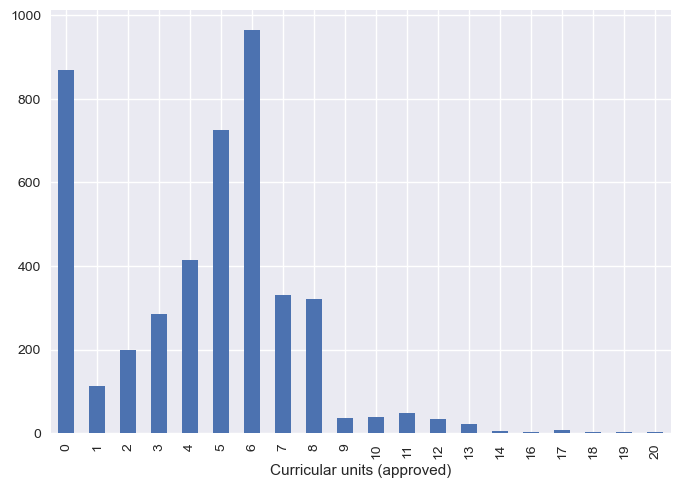

In [67]:
units_2nd_sem_approved.plot(xlabel='Curricular units (approved)',kind='bar');

### Curricular units 2nd sem (grade) <a class="anchor" id="thirty-second-bullet">

Comment: This is a float (continuous) column type in the metadata says is an integer type.

In [68]:
df['curricular_units_2nd_sem_(grade)'].describe()

count    4424.000000
mean       10.230206
std         5.210808
min         0.000000
25%        10.750000
50%        12.200000
75%        13.333333
max        18.571429
Name: curricular_units_2nd_sem_(grade), dtype: float64

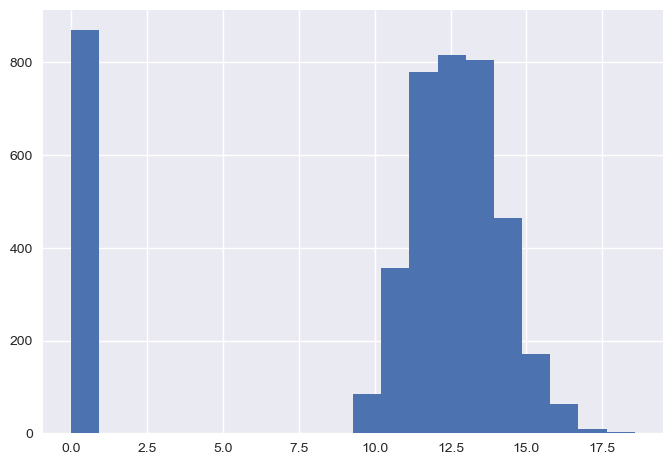

In [69]:
df['curricular_units_2nd_sem_(grade)'].hist(bins=20);

### Curricular units 2nd sem (without evaluations) <a class="anchor" id="thirty-third-bullet">

In [70]:
df['curricular_units_2nd_sem_(without_evaluations)'].describe()

count    4424.000000
mean        0.150316
std         0.753774
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        12.000000
Name: curricular_units_2nd_sem_(without_evaluations), dtype: float64

In [71]:
units_2nd_sem_without_evaluations = df['curricular_units_2nd_sem_(without_evaluations)'].value_counts().sort_index()
units_2nd_sem_without_evaluations

curricular_units_2nd_sem_(without_evaluations)
0     4142
1      140
2       48
3       35
4       21
5       17
6        8
7        5
8        6
12       2
Name: count, dtype: int64

Columns:
- 1- Number of curricular units without evaluations in 2nd semester
- 2- Number of students

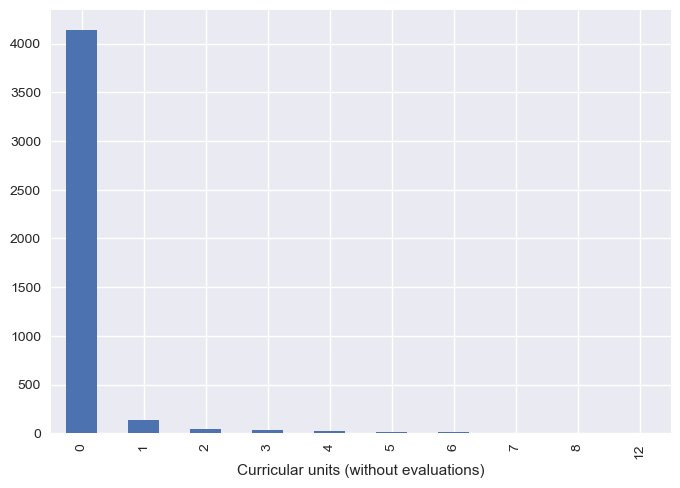

In [72]:
units_2nd_sem_without_evaluations.plot(xlabel='Curricular units (without evaluations)',kind='bar');

### Unemployment rate <a class="anchor" id="thirty-fourth-bullet">

In [73]:
df['unemployment_rate'].describe()

count    4424.000000
mean       11.566139
std         2.663850
min         7.600000
25%         9.400000
50%        11.100000
75%        13.900000
max        16.200000
Name: unemployment_rate, dtype: float64

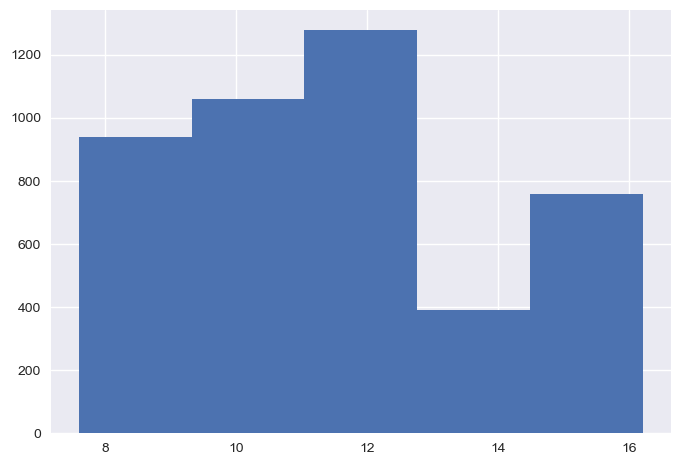

In [74]:
df['unemployment_rate'].hist(bins=5);

### Inflation rate <a class="anchor" id="thirty-fifth-bullet">

In [75]:
df['inflation_rate'].describe()

count    4424.000000
mean        1.228029
std         1.382711
min        -0.800000
25%         0.300000
50%         1.400000
75%         2.600000
max         3.700000
Name: inflation_rate, dtype: float64

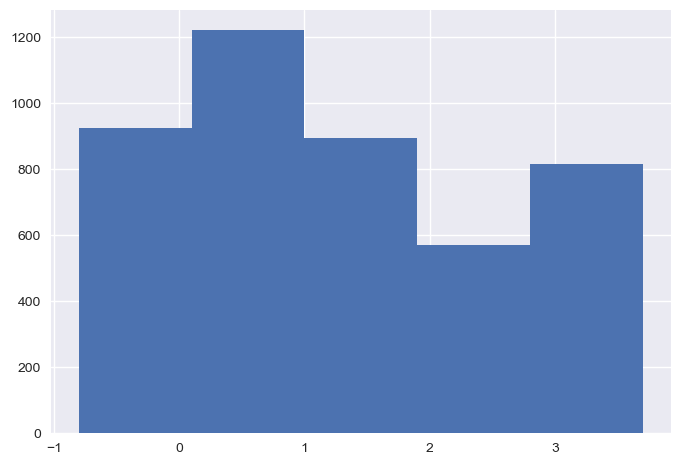

In [76]:
df['inflation_rate'].hist(bins=5);

### GDP <a class="anchor" id="thirty-sixth-bullet">

In [77]:
df['gdp'].describe()

count    4424.000000
mean        0.001969
std         2.269935
min        -4.060000
25%        -1.700000
50%         0.320000
75%         1.790000
max         3.510000
Name: gdp, dtype: float64

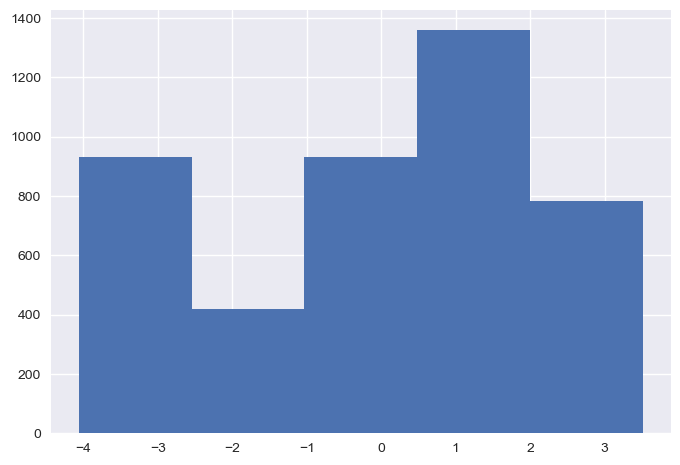

In [78]:
df['gdp'].hist(bins=5);

### Father's qualification <a class="anchor" id="tenth-bullet">

1. Secondary Education - 12th Year of Schooling or Eq.
2. Higher Education - Bachelor's Degree
3. Higher Education - Degree
4. Higher Education - Master's
5. Higher Education - Doctorate
6. Frequency of Higher Education
9. 12th Year of Schooling - Not Completed
10. 11th Year of Schooling - Not Completed
11. 7th Year (Old)
12. Other - 11th Year of Schooling
13. 2nd year complementary high school course
14. 10th Year of Schooling
18. General commerce course
19. Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.
20. Complementary High School Course
22. Technical-professional course
25. Complementary High School Course - not concluded
26. 7th year of schooling
27. 2nd cycle of the general high school course
29. 9th Year of Schooling - Not Completed
30. 8th year of schooling
31. General Course of Administration and Commerce
33. Supplementary Accounting and Administration
34. Unknown
35. Can't read or write
36. Can read without having a 4th year of schooling
37. Basic education 1st cycle (4th/5th year) or equiv.
38. Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.
39. Technological specialization course
40. Higher education - degree (1st cycle)
41. Specialized higher studies course
42. Professional higher technical course
43. Higher Education - Master (2nd cycle)
44. Higher Education - Doctorate (3rd cycle)

In [79]:
df["father\'s_qualification"].value_counts().sort_index()

father's_qualification
1      904
2       68
3      282
4       39
5       18
6        2
9        5
10       2
11      10
12      38
13       1
14       4
18       1
19     968
20       1
22       4
25       1
26       2
27       1
29       3
30       4
31       1
33       1
34     112
35       2
36       8
37    1209
38     702
39      20
40       5
41       2
42       1
43       2
44       1
Name: count, dtype: int64

In [80]:
df["father\'s_qualification"] = df["father\'s_qualification"].map({
    1: "Secondary_Education_12th_Year_of_Schooling_or_Eq",
    2: "Higher_Education_Bachelors_Degree",
    3: "Higher_Education_Degree",
    4: "Higher_Education_Masters",
    5: "Higher_Education_Doctorate",
    6: "Frequency_of_Higher_Education",
    9: "12th_Year_of_Schooling_Not_Completed",
    10: "11th_Year_of_Schooling_Not_Completed",
    11: "7th_Year_Old",
    12: "Other_11th_Year_of_Schooling",
    13: "2nd_year_complementary_high_school_course",
    14: "10th_Year_of_Schooling",
    18: "General_commerce_course",
    19: "Basic_Education_3rd_Cycle_9th/10th/11th_Year_or_Equiv",
    20: "Complementary_High_School_Course",
    22: "Technical-professional_course",
    25: "Complementary_High_School_Course_not_concluded",
    26: "7th_year_of_schooling",
    27: "2nd_cycle_of_the_general_high_school_course",
    29: "9th_Year_of_Schooling_Not_Completed",
    30: "8th_year_of_schooling",
    31: "General_Course_of_Administration_and_Commerce",
    33: "Supplementary_Accounting_and_Administration",
    34: "Unknown",
    35: "Can't_read_or_write",
    36: "Can_read_without_having_a_4th_year_of_schooling",
    37: "Basic_education_1st_cycle_4th/5th_year_or_equiv",
    38: "Basic_Education_2nd_Cycle_6th/7th/8th_Year_or_Equiv",
    39: "Technological_specialization_course",
    40: "Higher_education_degree_1st_cycle",
    41: "Specialized_higher_studies_course",
    42: "Professional_higher_technical_course",
    43: "Higher_Education_Master_2nd_cycle",
    44: "Higher_Education_Doctorate_3rd_cycle"
})


In [81]:
grouped_fathers_Qual = df["father\'s_qualification"].value_counts()
grouped_fathers_Qual

father's_qualification
Basic_education_1st_cycle_4th/5th_year_or_equiv          1209
Basic_Education_3rd_Cycle_9th/10th/11th_Year_or_Equiv     968
Secondary_Education_12th_Year_of_Schooling_or_Eq          904
Basic_Education_2nd_Cycle_6th/7th/8th_Year_or_Equiv       702
Higher_Education_Degree                                   282
Unknown                                                   112
Higher_Education_Bachelors_Degree                          68
Higher_Education_Masters                                   39
Other_11th_Year_of_Schooling                               38
Technological_specialization_course                        20
Higher_Education_Doctorate                                 18
7th_Year_Old                                               10
Can_read_without_having_a_4th_year_of_schooling             8
12th_Year_of_Schooling_Not_Completed                        5
Higher_education_degree_1st_cycle                           5
Technical-professional_course                  

In [82]:
df.columns

Index(['marital_status', 'application_mode', 'application_order', 'course',
       'daytime/evening_attendance', 'previous_qualification',
       'previous_qualification_(grade)', 'nationality',
       'mother's_qualification', 'father's_qualification',
       'mother's_occupation', 'father's_occupation', 'admission_grade',
       'displaced', 'educational_special_needs', 'debtor',
       'tuition_fees_up_to_date', 'gender', 'scholarship_holder',
       'age_at_enrollment', 'international',
       'curricular_units_1st_sem_(credited)',
       'curricular_units_1st_sem_(enrolled)',
       'curricular_units_1st_sem_(evaluations)',
       'curricular_units_1st_sem_(approved)',
       'curricular_units_1st_sem_(grade)',
       'curricular_units_1st_sem_(without_evaluations)',
       'curricular_units_2nd_sem_(credited)',
       'curricular_units_2nd_sem_(enrolled)',
       'curricular_units_2nd_sem_(evaluations)',
       'curricular_units_2nd_sem_(approved)',
       'curricular_units_2nd_s

### Mother's Occupation <a class="anchor" id="eleventh-bullet">

0. Student
1. Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers
2. Specialists in Intellectual and Scientific Activities
3. Intermediate Level Technicians and Professions
4. Administrative staff
5. Personal Services, Security and Safety Workers and Sellers
6. Farmers and Skilled Workers in Agriculture, Fisheries and Forestry
7. Skilled Workers in Industry, Construction and Craftsmen
8. Installation and Machine Operators and Assembly Workers
9. Unskilled Workers
10. Armed Forces Professions
90. Other Situation
99. (blank)
122. Health professionals
123. Teachers
125. Specialists in information and communication technologies (ICT)
131. Intermediate level science and engineering technicians and professions
132. Technicians and professionals, of intermediate level of health
134. Intermediate level technicians from legal, social, sports, cultural and similar services
141. Office workers, secretaries in general and data processing operators
143. Data, accounting, statistical, financial services and registry-related operators
144. Other administrative support staff
151. Personal service workers
152. Sellers
153. Personal care workers and the like
171. Skilled construction workers and the like, except electricians
173. Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like
175. Workers in food processing, woodworking, clothing and other industries and crafts
191. Cleaning workers
192. Unskilled workers in agriculture, animal production, fisheries and forestry
193. Unskilled workers in extractive industry, construction, manufacturing and transport
194. Meal preparation assistants


In [83]:
df['mother\'s_occupation'].isna().sum()

0

In [84]:
df.shape

(4424, 37)

In [85]:
Grouped_mothers_occup = df["mother\'s_occupation"].value_counts()
Grouped_mothers_occup

mother's_occupation
9      1577
4       817
5       530
3       351
2       318
7       272
0       144
1       102
6        91
90       70
8        36
191      26
99       17
194      11
141       8
123       7
144       6
175       5
192       5
193       4
134       4
10        4
143       3
151       3
132       3
152       2
122       2
153       2
173       1
125       1
131       1
171       1
Name: count, dtype: int64

In [86]:
#dropped mother's occupation column:
df = df.drop("mother\'s_occupation", axis=1)
print(df.columns)

Index(['marital_status', 'application_mode', 'application_order', 'course',
       'daytime/evening_attendance', 'previous_qualification',
       'previous_qualification_(grade)', 'nationality',
       'mother's_qualification', 'father's_qualification',
       'father's_occupation', 'admission_grade', 'displaced',
       'educational_special_needs', 'debtor', 'tuition_fees_up_to_date',
       'gender', 'scholarship_holder', 'age_at_enrollment', 'international',
       'curricular_units_1st_sem_(credited)',
       'curricular_units_1st_sem_(enrolled)',
       'curricular_units_1st_sem_(evaluations)',
       'curricular_units_1st_sem_(approved)',
       'curricular_units_1st_sem_(grade)',
       'curricular_units_1st_sem_(without_evaluations)',
       'curricular_units_2nd_sem_(credited)',
       'curricular_units_2nd_sem_(enrolled)',
       'curricular_units_2nd_sem_(evaluations)',
       'curricular_units_2nd_sem_(approved)',
       'curricular_units_2nd_sem_(grade)',
       'curricula

### Father's Occupation <a class="anchor" id="twelfth-bullet">

0. Student
1. Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers
2. Specialists in Intellectual and Scientific Activities
3. Intermediate Level Technicians and Professions
4. Administrative staff
5. Personal Services, Security and Safety Workers and Sellers
6. Farmers and Skilled Workers in Agriculture, Fisheries and Forestry
7. Skilled Workers in Industry, Construction and Craftsmen
8. Installation and Machine Operators and Assembly Workers
9. Unskilled Workers
10. Armed Forces Professions
90. Other Situation
99. (blank)
101. Armed Forces Officers
102. Armed Forces Sergeants
103. Other Armed Forces personnel
112. Directors of administrative and commercial services
114. Hotel, catering, trade and other services directors
121. Specialists in the physical sciences, mathematics, engineering and related techniques
122. Health professionals
123. Teachers
124. Specialists in finance, accounting, administrative organization, public and commercial relations
131. Intermediate level science and engineering technicians and professions
132. Technicians and professionals, of intermediate level of health
134. Intermediate level technicians from legal, social, sports, cultural and similar services
135. Information and communication technology technicians
141. Office workers, secretaries in general and data processing operators
143. Data, accounting, statistical, financial services and registry-related operators
144. Other administrative support staff
151. Personal service workers
152. Sellers
153. Personal care workers and the like
154. Protection and security services personnel
161. Market-oriented farmers and skilled agricultural and animal production workers
163. Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence
171. Skilled construction workers and the like, except electricians
172. Skilled workers in metallurgy, metalworking and similar
174. Skilled workers in electricity and electronics
175. Workers in food processing, woodworking, clothing and other industries and crafts
181. Fixed plant and machine operators
182. Assembly workers
183. Vehicle drivers and mobile equipment operators
192. Unskilled workers in agriculture, animal production, fisheries and forestry
193. Unskilled workers in extractive industry, construction, manufacturing and transport
194. Meal preparation assistants
195. Street vendors (except food) and street service providers


In [87]:
df["father\'s_occupation"] = df["father\'s_occupation"].map({
    0: "Student",
    1: "Representatives_of_the_Legislative_Power_and_Executive_Bodies_Directors_Directors_and_Executive_Managers",
    2: "Specialists_in_Intellectual_and_Scientific_Activities",
    3: "Intermediate_Level_Technicians_and_Professions",
    4: "Administrative_staff",
    5: "Personal_Services_Security_and_Safety_Workers_and_Sellers",
    6: "Farmers_and_Skilled_Workers_in_Agriculture_Fisheries_and_Forestry",
    7: "Skilled_Workers_in_Industry_Construction_and_Craftsmen",
    8: "Installation_and_Machine_Operators_and_Assembly_Workers",
    9: "Unskilled_Workers",
    10: "Armed_Forces_Professions",
    90: "Other_Situation",
    99: "blank",
    101: "Armed_Forces_Officers",
    102: "Armed_Forces_Sergeants",
    103: "Other_Armed_Forces_personnel",
    112: "Directors_of_administrative_and_commercial_services",
    114: "Hotel_catering_trade_and_other_services_directors",
    121: "Specialists_in_the_physical_sciences_mathematics_engineering_and_related_techniques",
    122: "Health_professionals",
    123: "Teachers",
    124: "Specialists_in_finance_accounting_administrative_organization_public_and_commercial_relations",
    131: "Intermediate_level_science_and_engineering_technicians_and_professions",
    132: "Technicians_and_professionals_of_intermediate_level_of_health",
    134: "Intermediate_level_technicians_from_legal_social_sports_cultural_and_similar_services",
    135: "Information_and_communication_technology_technicians",
    141: "Office_workers_secretaries_in_general_and_data_processing_operators",
    143: "Data_accounting_statistical_financial_services_and_registry_related_operators",
    144: "Other_administrative_support_staff",
    151: "Personal_service_workers",
    152: "Sellers",
    153: "Personal_care_workers_and_the_like",
    154: "Protection_and_security_services_personnel",
    161: "Market_oriented_farmers_and_skilled_agricultural_and_animal_production_workers",
    163: "Farmers_livestock_keepers_fishermen_hunters_and_gatherers_subsistence",
    171: "Skilled_construction_workers_and_the_like_except_electricians",
    172: "Skilled_workers_in_metallurgy_metalworking_and_similar",
    174: "Skilled_workers_in_electricity_and_electronics",
    175: "Workers_in_food_processing_woodworking_clothing_and_other_industries_and_crafts",
    181: "Fixed_plant_and_machine_operators",
    182: "Assembly_workers",
    183: "Vehicle_drivers_and_mobile_equipment_operators",
    192: "Unskilled_workers_in_agriculture_animal_production_fisheries_and_forestry",
    193: "Unskilled_workers_in_extractive_industry_construction_manufacturing_and_transport",
    194: "Meal_preparation_assistants",
    195: "Street_vendors_except_food_and_street_service_providers"
})


In [88]:
Grouped_fathers_occup= df["father\'s_occupation"].value_counts()
Grouped_fathers_occup

father's_occupation
Unskilled_Workers                                                                                           1010
Skilled_Workers_in_Industry_Construction_and_Craftsmen                                                       666
Personal_Services_Security_and_Safety_Workers_and_Sellers                                                    516
Administrative_staff                                                                                         386
Intermediate_Level_Technicians_and_Professions                                                               384
Installation_and_Machine_Operators_and_Assembly_Workers                                                      318
Armed_Forces_Professions                                                                                     266
Farmers_and_Skilled_Workers_in_Agriculture_Fisheries_and_Forestry                                            242
Specialists_in_Intellectual_and_Scientific_Activities                       

C:\Users\anjacobs\AppData\Local\Temp\ipykernel_16816\625155427.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=occupation_counts.index, y=occupation_counts.values, palette='viridis')


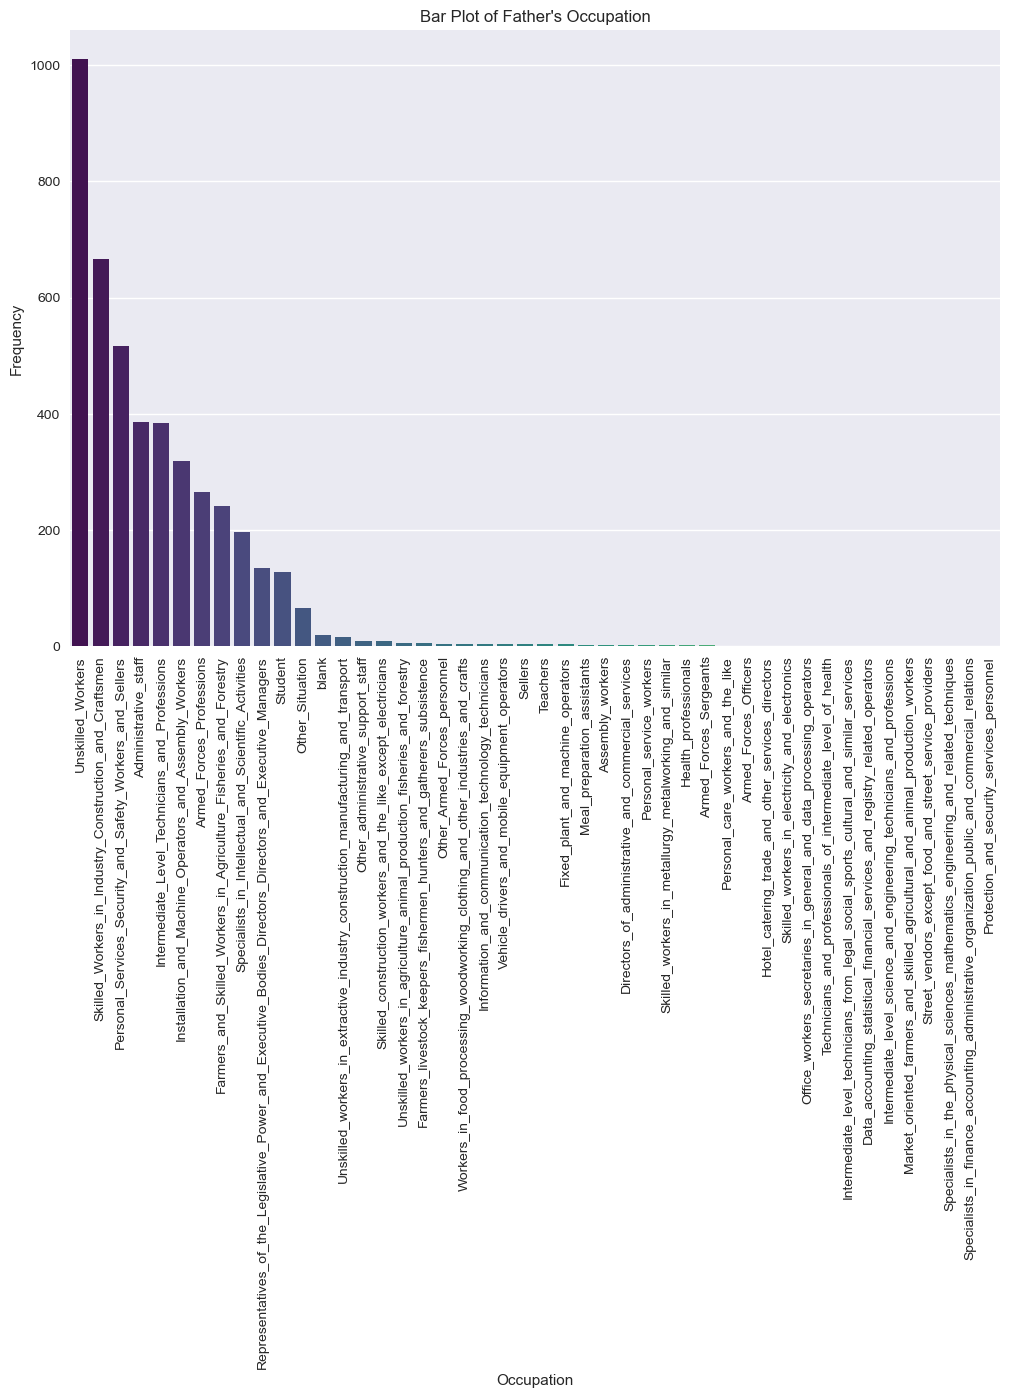

In [89]:
# Count the occurrences of each category
occupation_counts = df["father\'s_occupation"].value_counts()

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x=occupation_counts.index, y=occupation_counts.values, palette='viridis')
plt.title("Bar Plot of Father's Occupation")
plt.xlabel('Occupation')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate x-axis labels if there are many categories
plt.show()

### Admission Grade <a class="anchor" id="thirteenth-bullet">

In [90]:
admission_grader = df['admission_grade'].value_counts().sort_index()
admission_grader

admission_grade
95.0     11
95.1      1
95.5      2
95.8      1
96.0      7
         ..
180.4     1
183.5     1
184.0     1
184.4     1
190.0     3
Name: count, Length: 620, dtype: int64

In [91]:
df['admission_grade'].describe()

count    4424.000000
mean      126.978119
std        14.482001
min        95.000000
25%       117.900000
50%       126.100000
75%       134.800000
max       190.000000
Name: admission_grade, dtype: float64

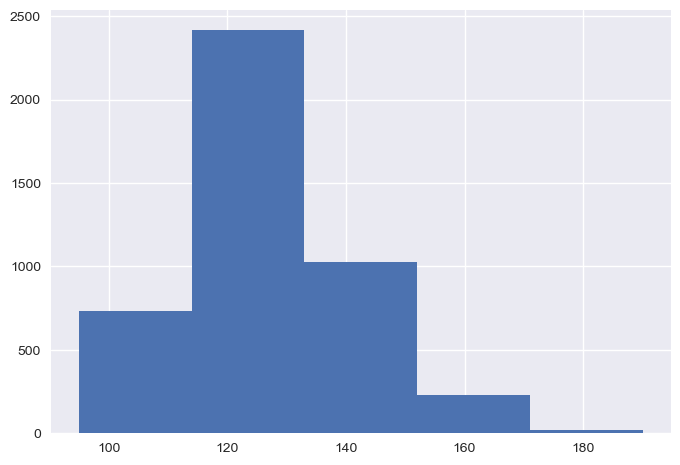

In [92]:
df['admission_grade'].hist(bins=5);

### Displaced <a class="anchor" id="fourteenth-bullet">

In [93]:
displaced = df['displaced'].value_counts().sort_index()
displaced

displaced
0    1998
1    2426
Name: count, dtype: int64

In [94]:
df['displaced'].describe()

count    4424.000000
mean        0.548373
std         0.497711
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: displaced, dtype: float64

###	description
1 – yes 
0 – no


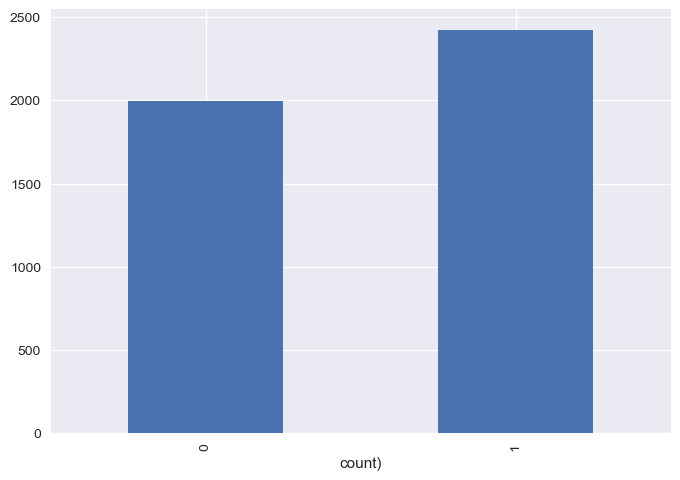

In [95]:
displaced.plot(xlabel='count)',kind='bar');

### Educational Special Needs <a class="anchor" id="fifteenth-bullet">

In [96]:
educational_special_needs = df['educational_special_needs'].value_counts().sort_index()
educational_special_needs

educational_special_needs
0    4373
1      51
Name: count, dtype: int64

###	description
1 – yes 
0 – no

In [97]:
df['educational_special_needs'].describe()

count    4424.000000
mean        0.011528
std         0.106760
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: educational_special_needs, dtype: float64

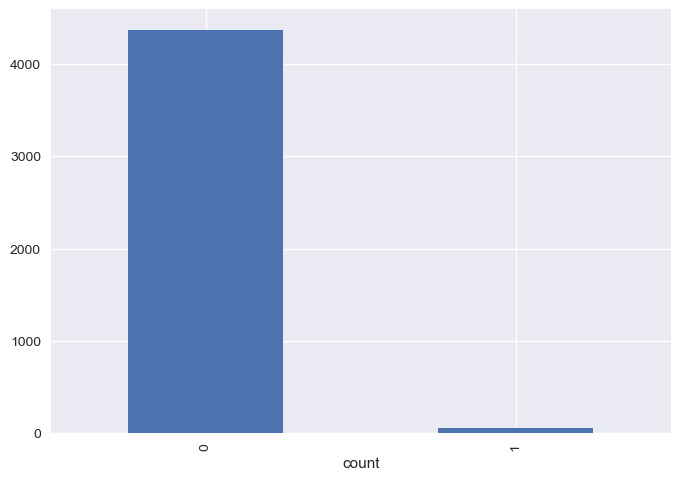

In [98]:
educational_special_needs.plot(xlabel='count',kind='bar');

### Debter <a class="anchor" id="sixteenth-bullet">

In [99]:
debtor = df['debtor'].value_counts().sort_index()
debtor

debtor
0    3921
1     503
Name: count, dtype: int64

###	description
1 – yes 
0 – no

In [100]:
df['debtor'].describe()

count    4424.000000
mean        0.113698
std         0.317480
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: debtor, dtype: float64

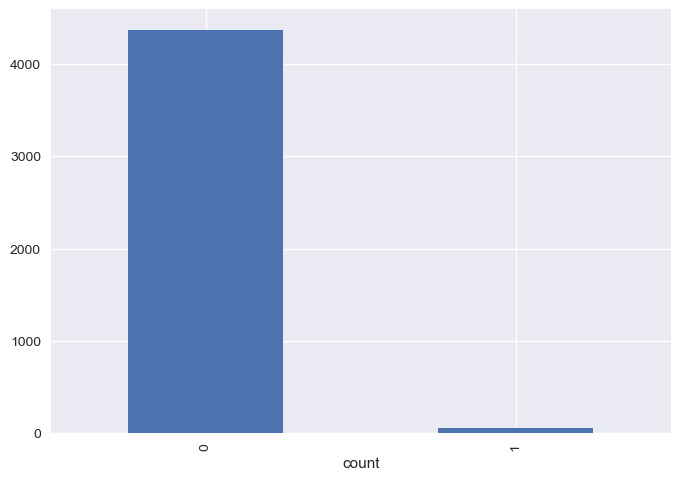

In [101]:
educational_special_needs.plot(xlabel='count',kind='bar');

### Tuition Fees Up To Date <a class="anchor" id="seventeenth-bullet">

In [102]:
tuition_fees_up_to_date = df['tuition_fees_up_to_date'].value_counts().sort_index()
tuition_fees_up_to_date

tuition_fees_up_to_date
0     528
1    3896
Name: count, dtype: int64

###	description
1 – yes 
0 – no

In [103]:
df['tuition_fees_up_to_date'].describe()

count    4424.000000
mean        0.880651
std         0.324235
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: tuition_fees_up_to_date, dtype: float64

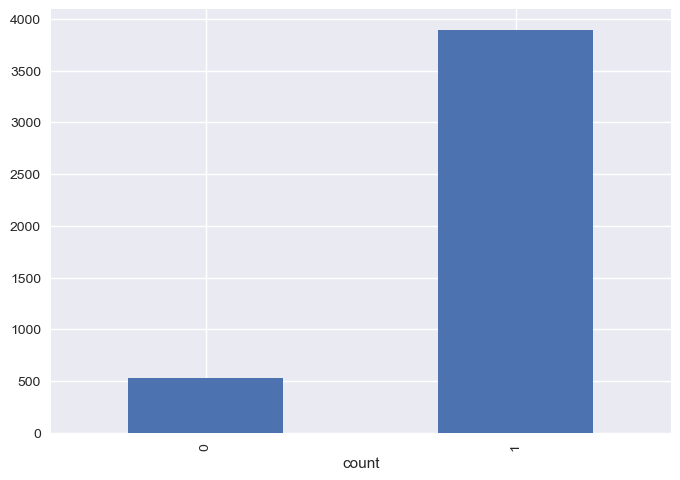

In [104]:
tuition_fees_up_to_date.plot(xlabel='count',kind='bar');

### Gender <a class="anchor" id="eighteenth-bullet">

In [105]:
gender = df['gender'].value_counts().sort_index()
gender

gender
0    2868
1    1556
Name: count, dtype: int64

###	description
1 – male 
0 – female

<Axes: xlabel='gender'>

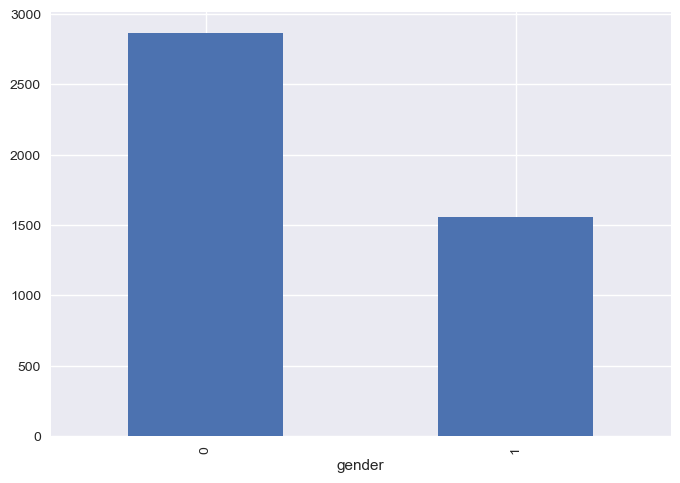

In [106]:
gender.plot(xlabel='gender',kind='bar')

In [107]:
df['gender'].describe()

count    4424.000000
mean        0.351718
std         0.477560
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: gender, dtype: float64